# Exploring Buisness Analytics


### Objective:
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

### Author: Madhushree M
Copyright Madhushree M, 2021

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

<IPython.core.display.Javascript object>

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

* All the datatypes are inline with the data

In [4]:
#Missing values
pd.DataFrame({'count':df.isna().sum(),'percentage':df.isna().sum()/len(df)})

<IPython.core.display.Javascript object>

,count,percentage
Ship Mode,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
Region,0,0.0
Category,0,0.0
Sub-Category,0,0.0
Sales,0,0.0


* There are no missing values present in the data

In [5]:
#5 point summary
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


* The distribution of profit and sales are right skewed as the central values mean and median are not close.
* Quantity and Discount are near normal

In [6]:
# confirming by skewness
df.skew()

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

* As noticed Sales and profit are right skewed

In [7]:
#duplicates
print('Number of Duplicate entries are ',df.duplicated().sum())

df.drop_duplicates(inplace=True)
print('Number of Duplicate entries after dropping are ',df.duplicated().sum())

Number of Duplicate entries are  17
Number of Duplicate entries after dropping are  0


In [8]:
df = df.drop('Country',1)

* As the data belongs US,we only have US as a country hence dropping country

### Univariate Analysis

In [9]:
df_cat = df.select_dtypes(exclude=np.number)
df_num = df.select_dtypes(include=np.number)
df_cat['Postal Code'] = df_num['Postal Code']
df_num = df_num.drop(['Postal Code'],1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

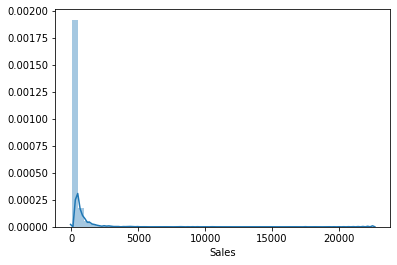

<IPython.core.display.Javascript object>

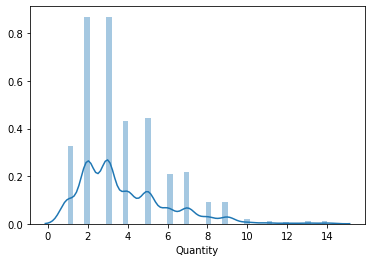

<IPython.core.display.Javascript object>

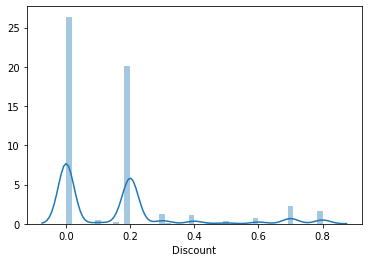

<IPython.core.display.Javascript object>

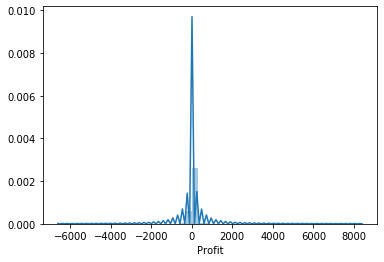

In [10]:
for i in df_num:
    sns.distplot(df[i])
    plt.show()

* There is skewness observed in data 

In [11]:
for i in df_cat:
    print(pd.DataFrame({'count':df[i].value_counts(),'percentage':df[i].value_counts(normalize=True)}))
    print('\n')

<IPython.core.display.Javascript object>

                count  percentage
Standard Class   5955    0.596873
Second Class     1943    0.194748
First Class      1537    0.154054
Same Day          542    0.054325




<IPython.core.display.Javascript object>

             count  percentage
Consumer      5183    0.519495
Corporate     3015    0.302195
Home Office   1779    0.178310




<IPython.core.display.Javascript object>

               count  percentage
New York City    914    0.091611
Los Angeles      746    0.074772
Philadelphia     536    0.053724
San Francisco    506    0.050717
Seattle          424    0.042498
...              ...         ...
Chapel Hill        1    0.000100
Goldsboro          1    0.000100
Saint Peters       1    0.000100
Murrieta           1    0.000100
Baytown            1    0.000100

[531 rows x 2 columns]




<IPython.core.display.Javascript object>

                      count  percentage
California             1996    0.200060
New York               1127    0.112960
Texas                   983    0.098527
Pennsylvania            586    0.058735
Washington              502    0.050316
Illinois                491    0.049213
Ohio                    468    0.046908
Florida                 383    0.038388
Michigan                254    0.025459
North Carolina          249    0.024957
Virginia                224    0.022452
Arizona                 224    0.022452
Georgia                 184    0.018442
Tennessee               183    0.018342
Colorado                182    0.018242
Indiana                 149    0.014934
Kentucky                139    0.013932
Massachusetts           135    0.013531
New Jersey              130    0.013030
Oregon                  123    0.012328
Wisconsin               110    0.011025
Maryland                105    0.010524
Delaware                 96    0.009622
Minnesota                89    0.008921


<IPython.core.display.Javascript object>

         count  percentage
West      3193    0.320036
East      2845    0.285156
Central   2319    0.232435
South     1620    0.162373




<IPython.core.display.Javascript object>

                 count  percentage
Office Supplies   6012    0.602586
Furniture         2118    0.212288
Technology        1847    0.185126




<IPython.core.display.Javascript object>

             count  percentage
Binders       1522    0.152551
Paper         1359    0.136213
Furnishings    956    0.095820
Phones         889    0.089105
Storage        846    0.084795
Art            795    0.079683
Accessories    775    0.077679
Chairs         615    0.061642
Appliances     466    0.046707
Labels         363    0.036384
Tables         319    0.031974
Envelopes      254    0.025459
Bookcases      228    0.022853
Fasteners      217    0.021750
Supplies       190    0.019044
Machines       115    0.011527
Copiers         68    0.006816




<IPython.core.display.Javascript object>

       count  percentage
10035    263    0.026361
10024    230    0.023053
10009    229    0.022953
94122    199    0.019946
10011    192    0.019244
...      ...         ...
33458      1    0.000100
95616      1    0.000100
48307      1    0.000100
61832      1    0.000100
59102      1    0.000100

[631 rows x 2 columns]




* The individual counts and their respective percentages were shown above

### Bivariate Analysis

#### Loss making States

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

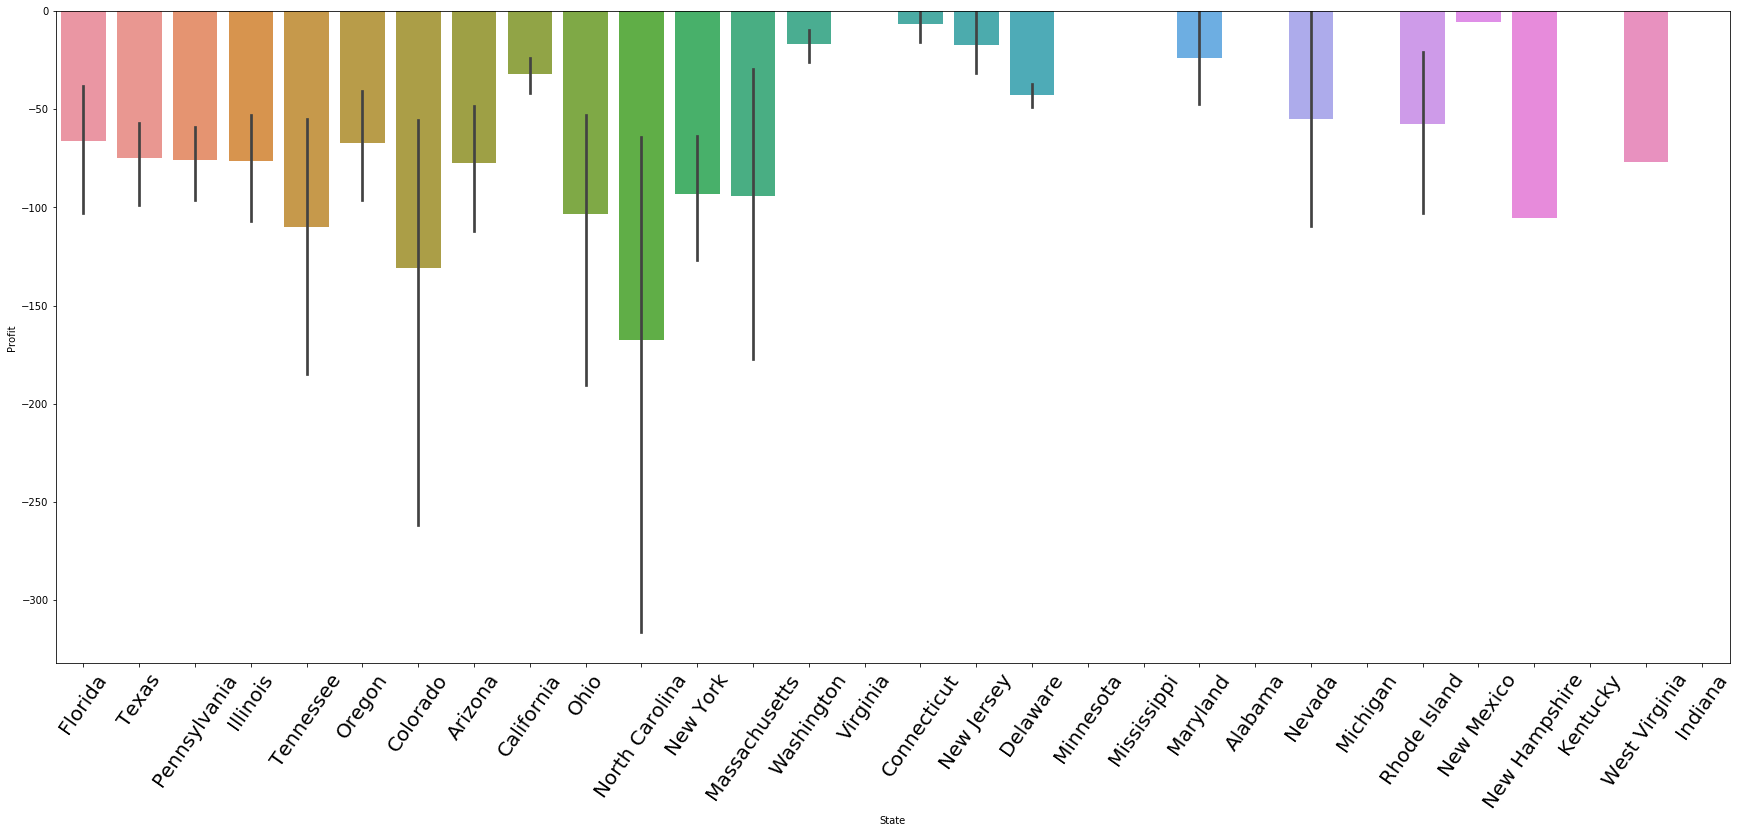

In [12]:
plt.figure(figsize=(30,12))
sns.barplot(df[df['Profit']<=0]['State'],df[df['Profit']<=0]['Profit'])
plt.xticks(rotation=55,fontsize=20)
plt.show()

* The above are the states where the profit is less than or equal to 0.
* One need to analyse the reasons behind this.
* Out of all business states these were the ones where Profit margin is on negative side.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

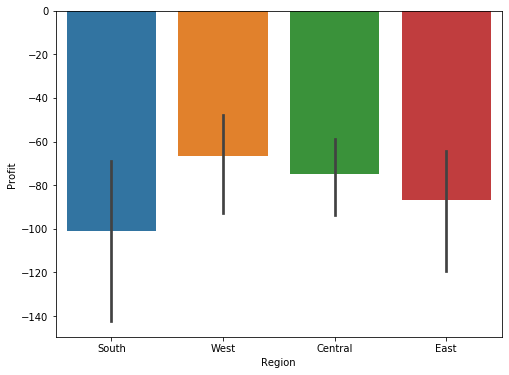

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(df['Region'], df[df['Profit']<=0]['Profit'])
plt.show()

* The above plot confirms that the region south has bigger loss and this region has to be monitored

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

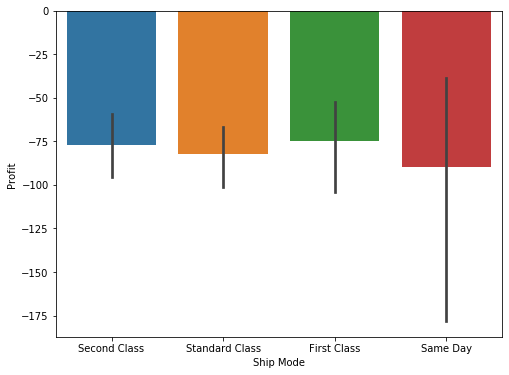

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(df['Ship Mode'], df[df['Profit']<=0]['Profit'])
plt.show()

* The shipmode which is on the same day might yeild certain loss as per the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

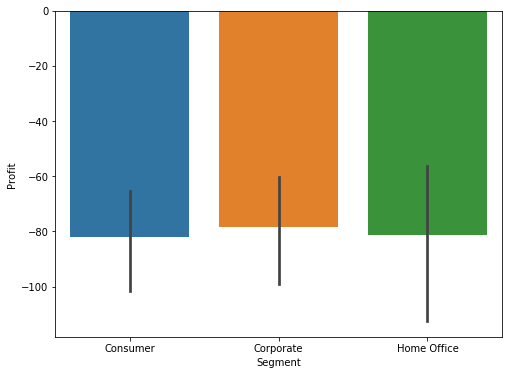

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(df['Segment'], df[df['Profit']<=0]['Profit'])
plt.show()

* The loss prone Segements are above

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

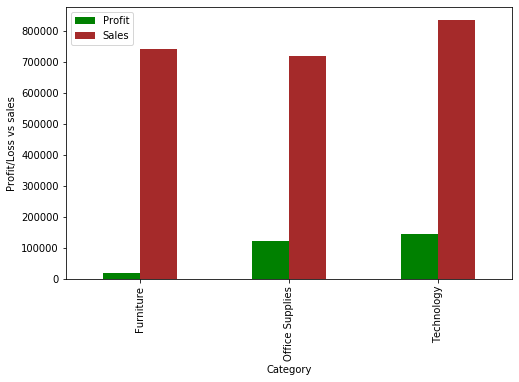

In [17]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','brown'],figsize=(8,5))
plt.ylabel('Profit/Loss vs sales')
plt.show()

* AS we can see Technology being higher sales drawing our higher profits.
* The weaker Category can be Furniture as the sales are significant but the profit is not reliable.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

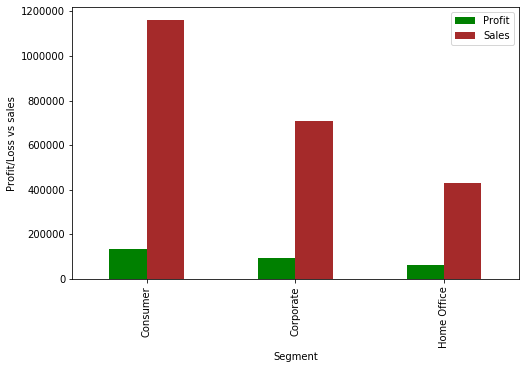

In [18]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['green','brown'],figsize=(8,5))
plt.ylabel('Profit/Loss vs sales')
plt.show()

* Home Office segment was not really contributing much to profits, but it has certain capacity to dram more oprofits if the sales numbers goes up

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

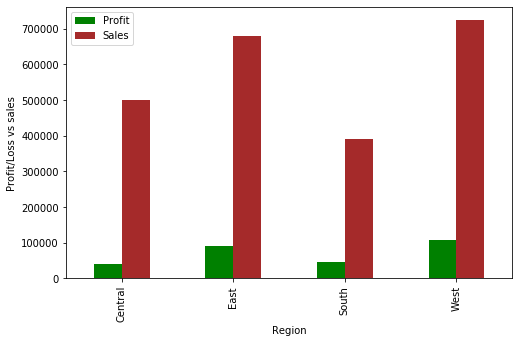

In [19]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['green','brown'],figsize=(8,5))
plt.ylabel('Profit/Loss vs sales')
plt.show()

* The sales numbers of South vs profit depicts the potential ,focusing more on such region can help organization to derive more profits.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

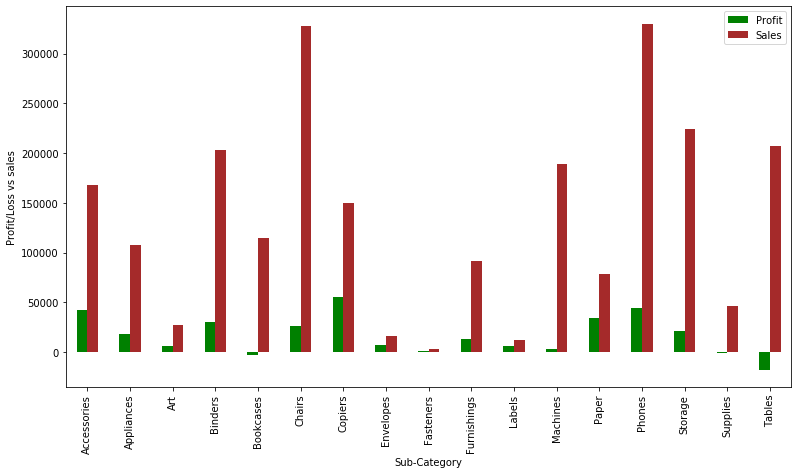

In [20]:
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['green','brown'],figsize=(13,7))
plt.ylabel('Profit/Loss vs sales')
plt.show()

* Tables and Bookcases category incurring losses even after good amount of sales numbers.
* Line of focus can shift on to these two categories to register profits.
* There is no profit registered from Fasteners.
* Selling large number of Machines still not helping out to make profits,Machines can also be under Radar.